## Homework

> Note: sometimes your answer doesn't match one of the options exactly. That's fine. 
Select the option that's closest to your solution.

### Dataset

In this homework, we will use the Car price dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
```

We'll keep working with the `MSRP` variable, and we'll transform it to a classification task. 

### Features

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`

### Data preparation

* Select only the features from above and transform their names using next line:
  ```
  data.columns = data.columns.str.replace(' ', '_').str.lower()
  ```
* Fill in the missing values of the selected features with 0.
* Rename `MSRP` variable to `price`.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
COLUMNS = ['make', 'model', 'year',  'engine_hp',
       'engine_cylinders', 'transmission_type', 'vehicle_style',
       'highway_mpg','city_mpg', 'price']
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')
data.columns = data.columns.str.replace(' ', '_').str.lower()
data = data.fillna(0)

data['price'] = data['msrp']

data = data[COLUMNS]


### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

- `AUTOMATIC`
- `MANUAL`
- `AUTOMATED_MANUAL`
- `DIRECT_DRIVE`

AUTOMATIC

In [3]:
data['transmission_type'].value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- `engine_hp` and `year`
- `engine_hp` and `engine_cylinders`
- `highway_mpg` and `engine_cylinders`
- `highway_mpg` and `city_mpg`

`highway_mpg` and `city_mpg`


<Axes: >

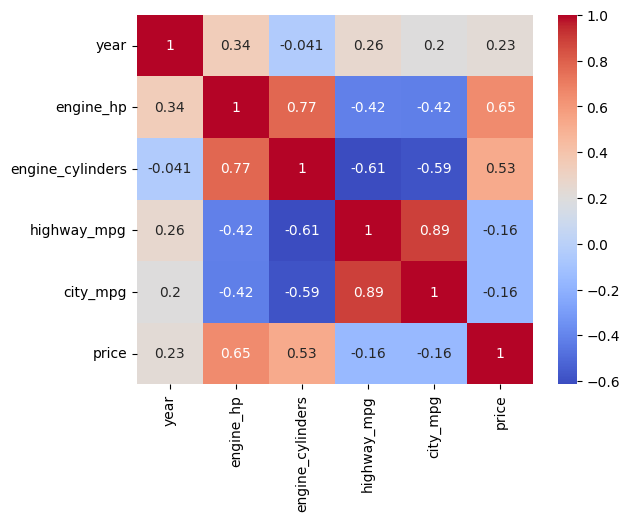

In [4]:
sns.heatmap(data.corr(numeric_only = True), annot = True, cmap = 'coolwarm')

### Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`above_average`) is not in your dataframe.


In [5]:
data['above_average'] = np.where(data['price'] > data['price'].mean(), 1, 0) * 1

In [6]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=42)

### Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset. 
  Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?
  
- `make`
- `model`
- `transmission_type`
- `vehicle_style`

transmission_type

In [7]:
from sklearn.metrics import mutual_info_score

In [8]:
CAT_VARS = df_train.select_dtypes('O').columns

for col in CAT_VARS:
    score = mutual_info_score( df_train[col], df_train['above_average'])
   
    print(f'Mutual call between above average and {col} {round(score,2)} ')

Mutual call between above average and make 0.24 
Mutual call between above average and model 0.46 
Mutual call between above average and transmission_type 0.02 
Mutual call between above average and vehicle_style 0.08 


### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.60
- 0.72
- 0.84
- 0.95

0.95

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [11]:
X_cols = ['make', 'model', 'year',  'engine_hp',
       'engine_cylinders', 'transmission_type', 'vehicle_style',
       'highway_mpg','city_mpg',]
TARGET = 'above_average'


In [28]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dict = df_train[X_cols].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[X_cols].to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test[X_cols].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [29]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, df_train[TARGET])

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [31]:
preds = model.predict(X_val)
original_accuracy = accuracy_score(df_val[TARGET], preds)
print(round(original_accuracy,2))

0.94


In [12]:
# ohe = OneHotEncoder( handle_unknown = 'ignore' )

# train_data = ohe.fit_transform(df_train[X_cols])
# val_data = ohe.transform(df_val[X_cols])
# test_data = ohe.transform(df_test[X_cols])

In [13]:
# from sklearn.pipeline import Pipeline

# model = Pipeline([('ohe', OneHotEncoder( handle_unknown = 'ignore')), 
#                   ('log',LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42))])

In [14]:
# model.fit(df_train[X_cols], df_train[TARGET])

Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown='ignore')),
                ('log',
                 LogisticRegression(C=10, max_iter=1000, random_state=42,
                                    solver='liblinear'))])

In [32]:
# preds = model.predict(df_val[X_cols])
# original_accuracy = accuracy_score(df_val[TARGET], preds)
# print(round(original_accuracy,2))

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `year`
- `engine_hp`
- `transmission_type`
- `city_mpg`

transmission_type

> **Note**: the difference doesn't have to be positive

In [33]:
pred_dict_elimination = {}
for col in ['year','engine_hp', 'transmission_type','city_mpg']:
    eliminated_data_train = df_train[X_cols].drop(col,axis= 1)
    eliminated_data_val = df_val[X_cols].drop(col,axis= 1) 

    dv = DictVectorizer(sparse=False)
    
    train_dict = eliminated_data_train.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    
    val_dict = eliminated_data_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    model.fit(X_train, df_train[TARGET])

    new_preds = model.predict(X_val)
    new_acc = accuracy_score(df_val[TARGET], new_preds)
   
    pred_dict_elimination[col] = original_accuracy - new_acc

In [34]:
for w in sorted(pred_dict_elimination, key=pred_dict_elimination.get):
    print(w, pred_dict_elimination[w])

transmission_type -0.008914525432616727
city_mpg -0.008390141583639266
year -0.007341373885684344
engine_hp 0.004719454640797038


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

- 0
- 0.01
- 0.1
- 1
- 10

0
> **Note**: If there are multiple options, select the smallest `alpha`.

In [35]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [36]:
df_train['price_log'] = np.log1p(df_train['price'])
df_val['price_log'] = np.log1p(df_val['price'])
df_test['price_log'] = np.log1p(df_test['price'])

In [39]:
dict_rmse = {}
for a in [0, 0.01, 0.1, 1, 10]:
    dv = DictVectorizer(sparse=False)

    train_dict = df_train[X_cols].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    
    val_dict = df_val[X_cols].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    model_reg =Ridge(solver='sag', alpha=a, random_state=42)

    
    model_reg.fit(X_train, df_train['price_log'])

    preds_ridge = model_reg.predict(X_val)
    rmse = mean_squared_error(preds_ridge, df_val['price_log'])
    print(f'Alpha {a} rmse {rmse}')

    dict_rmse[a] = rmse

Alpha 0 rmse 0.24042453529724472
Alpha 0.01 rmse 0.24042468458037677
Alpha 0.1 rmse 0.24042602812686803
Alpha 1 rmse 0.24047018414055976
Alpha 10 rmse 0.2406938949582468


In [40]:
for w in sorted(dict_rmse, key=dict_rmse.get):
    print(w, dict_rmse[w])

0 0.24042453529724472
0.01 0.24042468458037677
0.1 0.24042602812686803
1 0.24047018414055976
10 0.2406938949582468


In [69]:
# with one hot encoder of scikit-learn
for w in sorted(dict_rmse, key=dict_rmse.get):
    print(w, dict_rmse[w])

0.01 0.013050367965306496
0.1 0.013055271558041573
0 0.013148799044744268
1 0.016533850555277622
10 0.03670417168039577
